In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from graphviz import Source

In [2]:
df_mould = pd.read_csv('D:\\桌面\\Train_Mould\\CH_Y.csv')
df_mould.head(10)

,Unnamed: 0,Timestamp,Z1_mean,Z1_max,Z1_min,Z1_std,Z1_skew,Z1_kurtosis,Z1_peakTopeak,Z1_RMS,...,Current_max,Product,Production,Active_time(H),Utilization_capacity(T/H),Hole_size,Cutters,Clean_mould,work_stat,Mould_life
0,0,2020/8/6 00:00,0.169920,0.632324,-0.288086,0.056986,0.097843,11.729121,0.920410,0.180677,...,0,0,0.0,0.0,0.0,0,0,0,0,3
1,1,2020/8/6 00:01,0.171129,0.625000,-0.272217,0.054116,0.380044,12.547399,0.897217,0.181634,...,0,0,0.0,0.0,0.0,0,0,0,0,3
2,2,2020/8/6 00:02,0.171056,0.611572,-0.272217,0.054945,0.275383,13.143974,0.883789,0.180369,...,0,0,0.0,0.0,0.0,0,0,0,0,3
3,3,2020/8/6 00:03,0.169828,0.572510,-0.267334,0.057269,0.091348,10.469897,0.839844,0.180933,...,0,0,0.0,0.0,0.0,0,0,0,0,3
4,4,2020/8/6 00:04,0.171111,0.588379,-0.280762,0.053189,0.408062,13.450596,0.869141,0.180843,...,0,0,0.0,0.0,0.0,0,0,0,0,3
5,5,2020/8/6 00:05,0.170881,0.578613,-0.264893,0.053314,0.138687,13.621012,0.843506,0.179977,...,0,0,0.0,0.0,0.0,0,0,0,0,3
6,6,2020/8/6 00:06,0.170905,0.554199,-0.280762,0.053517,0.073969,13.076935,0.834961,0.179814,...,0,0,0.0,0.0,0.0,0,0,0,0,3
7,7,2020/8/6 00:07,0.171073,0.585938,-0.277100,0.055524,0.093572,12.013246,0.863037,0.180230,...,0,0,0.0,0.0,0.0,0,0,0,0,3
8,8,2020/8/6 00:08,0.170987,0.632324,-0.277100,0.055153,0.139478,12.747721,0.909424,0.180380,...,0,0,0.0,0.0,0.0,0,0,0,0,3
9,9,2020/8/6 00:09,0.170975,0.578613,-0.288086,0.053753,0.005012,13.229906,0.866699,0.179601,...,0,0,0.0,0.0,0.0,0,0,0,0,3


In [3]:
df_mould.columns

Index(['Unnamed: 0', 'Timestamp', 'Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std',
       'Z1_skew', 'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur', 'machine_Status_avg', 'Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat', 'Mould_life'],
      dtype='object')

In [4]:
#X有手抄表
X = df_mould[['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat']]
y = df_mould['Mould_life']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=40)

In [6]:
xgbClf = XGBClassifier(max_depth=5,max_leaf_nodes=5)

In [7]:
xgbClf.fit(X_train,y_train)

[14:56:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              max_leaf_nodes=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
xgbClf.score(X_test,y_test)

0.9575617283950617

In [9]:
xgb_pred = xgbClf.predict(X_test)

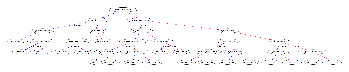

In [10]:
xgb.plot_tree(xgbClf)

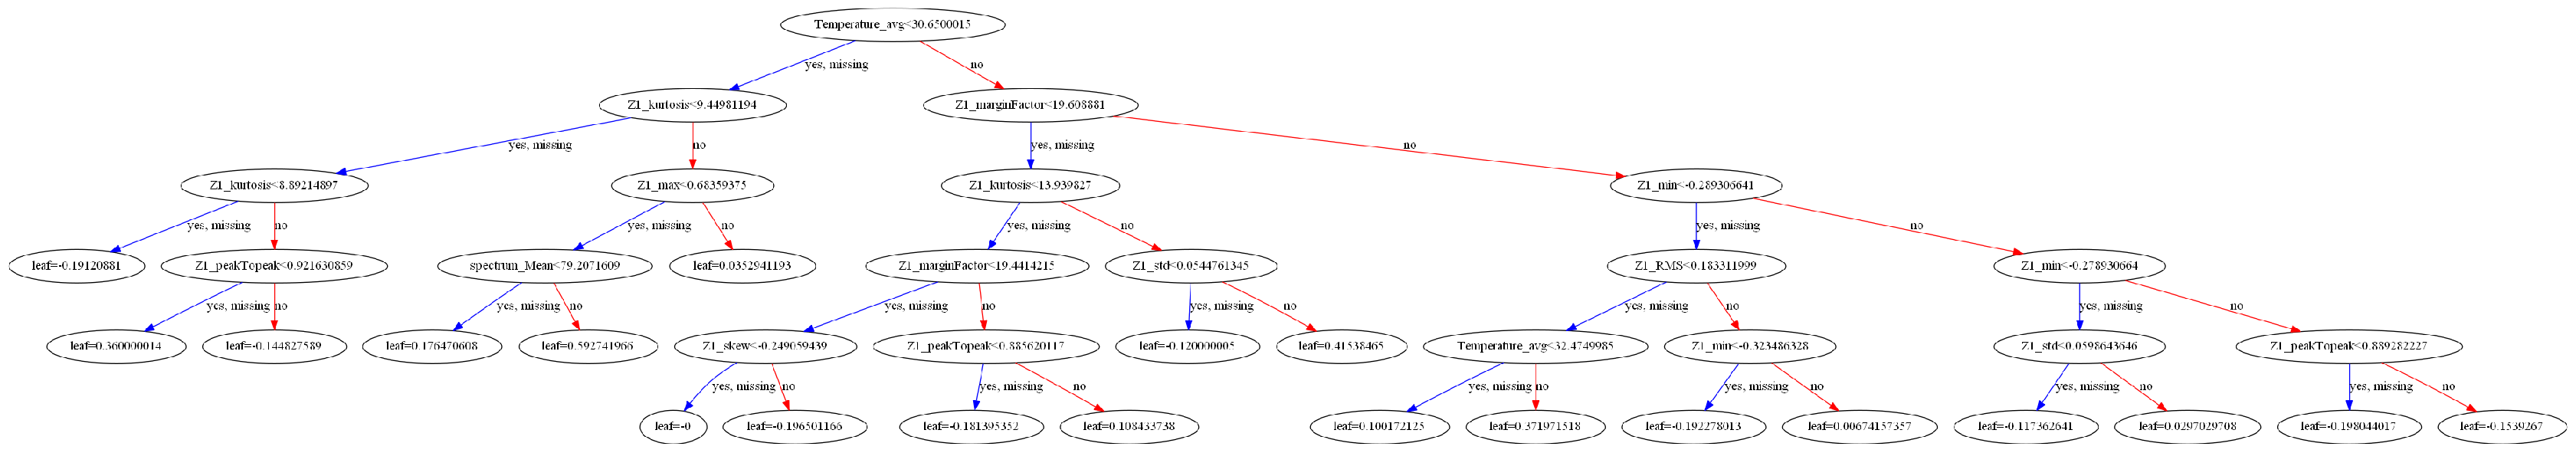

In [11]:
fig,ax = plt.subplots()
fig.set_size_inches(60,30)
xgb.plot_tree(xgbClf,ax = ax)

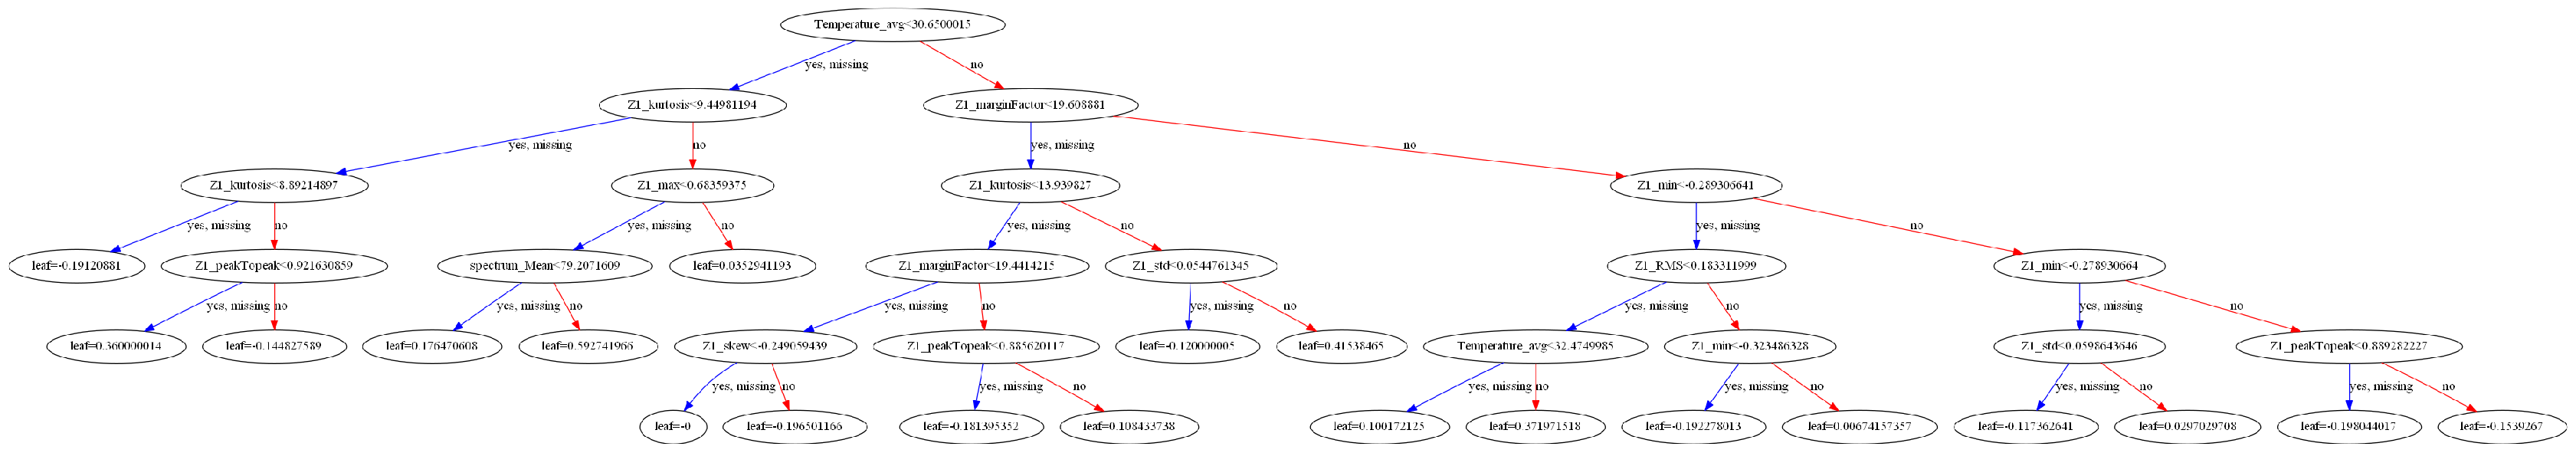

In [12]:
fig

In [13]:
fig.savefig('xgb_tree.png')

In [14]:
#混沌矩陣
print(confusion_matrix(y_test,xgb_pred))
#分類器數值
print(classification_report(y_test,xgb_pred))

[[260   1   0  34]
 [  1  44   0   2]
 [  0   2  51   1]
 [ 14   0   0 886]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       295
           1       0.94      0.94      0.94        47
           2       1.00      0.94      0.97        54
           3       0.96      0.98      0.97       900

    accuracy                           0.96      1296
   macro avg       0.96      0.94      0.95      1296
weighted avg       0.96      0.96      0.96      1296



In [15]:
#X無手抄表
X = df_mould[['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','Temperature_avg', 'Current_avg',
       'Current_max']]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=40)

In [17]:
xgbClf_2 = XGBClassifier(max_depth=5,max_leaf_nodes=5)

In [18]:
xgbClf_2.fit(X_train,y_train)

[14:57:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              max_leaf_nodes=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
xgbClf_2.score(X_test,y_test)

0.9567901234567902

In [20]:
xgb_pred_2 = xgbClf_2.predict(X_test)

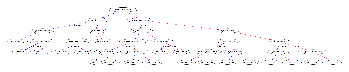

In [21]:
xgb.plot_tree(xgbClf_2)

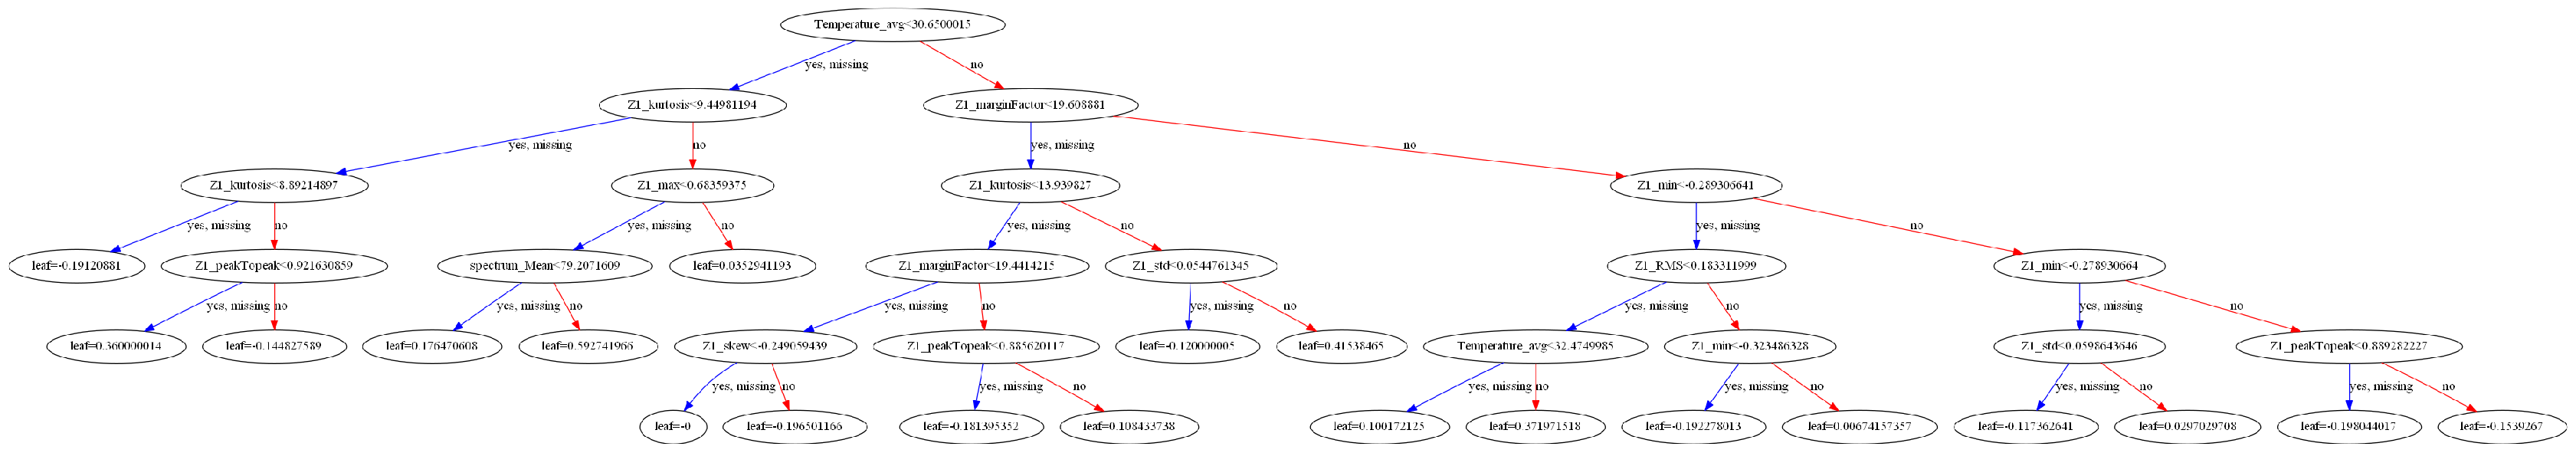

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(60,30)
xgb.plot_tree(xgbClf_2,ax = ax)

In [23]:
#混沌矩陣
print(confusion_matrix(y_test,xgb_pred_2))
#分類器數值
print(classification_report(y_test,xgb_pred_2))

[[263   1   0  31]
 [  1  45   0   1]
 [  0   1  50   3]
 [ 14   1   3 882]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       295
           1       0.94      0.96      0.95        47
           2       0.94      0.93      0.93        54
           3       0.96      0.98      0.97       900

    accuracy                           0.96      1296
   macro avg       0.95      0.94      0.94      1296
weighted avg       0.96      0.96      0.96      1296

